In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Problem 2

## Part A

In [2]:
#define a funciton to generate the specific scatter plots
def plot_scatter(axs,r,c,X,Y,X_headers,Y_header,num_genes):
    if r != c:
        if r < num_genes:
            r_data = X[:,r]
            r_name = X_headers[r]
        else:
            r_data = Y
            r_name = Y_header

        if c < num_genes:
            c_data = X[:,c]
            c_name = X_headers[c]
        else:
            c_data = Y
            c_name = Y_header

        axs[r,c].scatter(r_data,c_data)
        axs[r,c].set_xlabel(r_name)
        axs[r,c].set_ylabel(c_name)
        axs[r,c].set_title(r_name + " vs " + c_name)


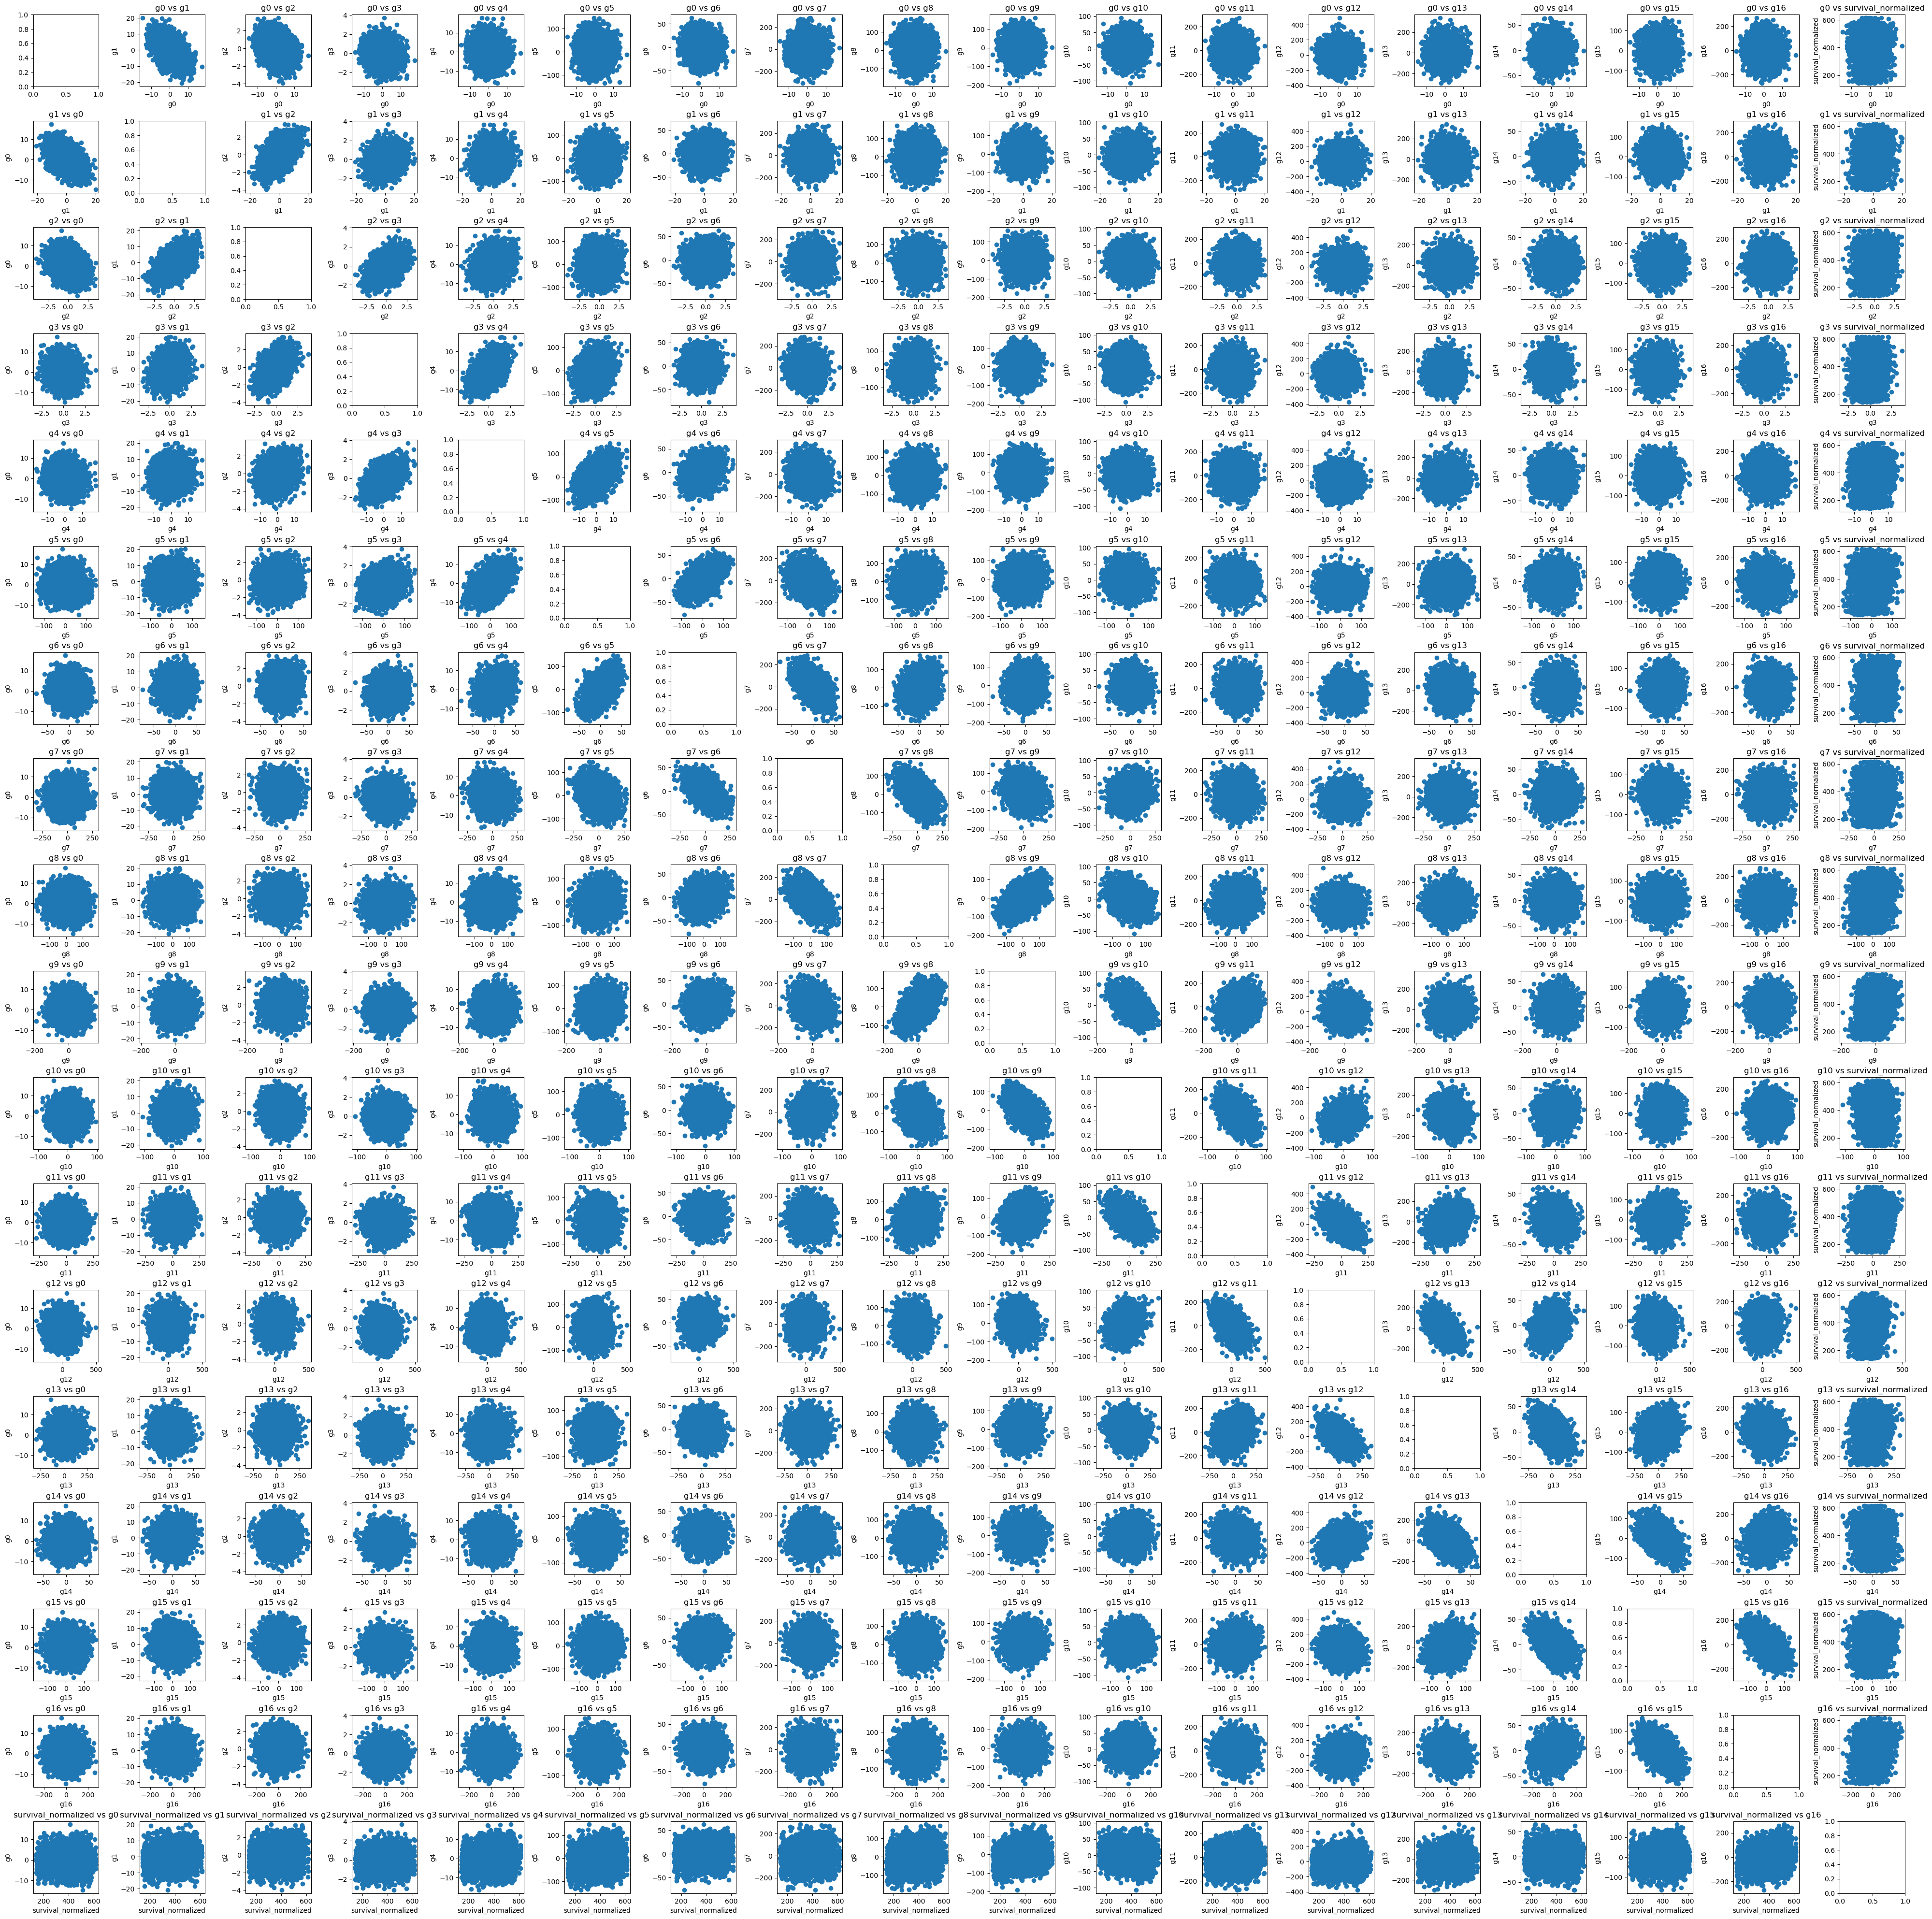

In [3]:
# import the dataset

df = pd.read_csv('lineberger_study_data.csv')

#get the headers
headers = df.columns.values.tolist()
Y_header = headers[1]
X_headers = headers[2:]
num_genes = len(X_headers)

Y = df.loc[:,Y_header].to_numpy()
X = df.loc[:,X_headers].to_numpy()

#generate a scatter plot of the data
fig,axs = plt.subplots(num_genes+1,num_genes+1,figsize=(40,40))
fig.tight_layout(pad=3)
for r in range(0,num_genes+1):
    for c in range(0,num_genes+1):
        plot_scatter(axs,r,c,X,Y,X_headers,Y_header,num_genes)




Based on the correlation matrix, it appears that genes g0, g5, and g16 are most strongly linearly correlated with the outcome. There don't appear to be too many obvious outliers, but it appears that g2,g4, and g6 don't appear to be very correlated at all.

# Part B
- used a confidence interval function 

In [4]:
#fit a linear model using the statsmodels.api
X_with_int = sm.add_constant(X,prepend=False)
model = sm.OLS(Y,X_with_int)
results = model.fit()

X_headers_with_int = X_headers.copy()
X_headers_with_int.append("intercept")

#get the coefficients
coeffs = pd.DataFrame(results.params)
coeffs.columns = ["coefficients"]
coeffs.index = X_headers_with_int


#get the confidence intervals
#results.conf_int(alpha=0.05)
conf_intervals = pd.DataFrame(results.conf_int(alpha=0.05))
conf_intervals.columns = ["lower","upper"]
conf_intervals.index = X_headers_with_int

print("Coefficients")
display(coeffs)

print("Confidence Intervals\n")
display(conf_intervals)

print("R2 Value {}".format(results.rsquared))

Coefficients


,coefficients
g0,3.240000
g1,3.000000
g2,5.000000
g3,-4.000000
g4,1.000000
g5,0.500000
g6,0.500000
g7,0.500000
g8,0.500000
g9,0.500000


Confidence Intervals



,lower,upper
g0,2.686342,3.793658
g1,2.544712,3.455288
g2,2.562223,7.437777
g3,-6.907164,-1.092836
g4,0.467680,1.532320
g5,0.438353,0.561647
g6,0.359767,0.640233
g7,0.469234,0.530766
g8,0.452127,0.547873
g9,0.445925,0.554075


R2 Value 0.5256866386672356


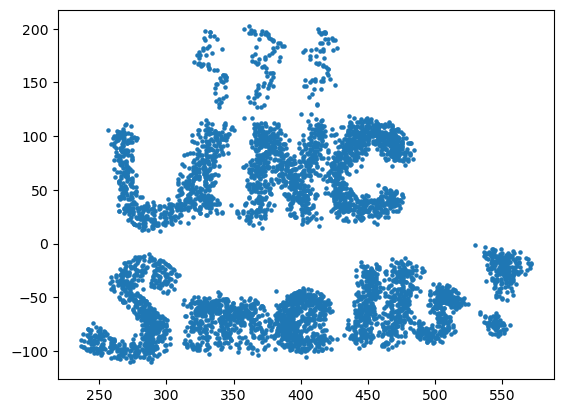

In [5]:
#plot the fitted values vs the residuals

fitted_vals = results.fittedvalues
residuals = results.resid

fig = plt.figure()

plt.scatter(fitted_vals,residuals,s=5)

It results in the words: "UNC Smells!"